<a href="https://colab.research.google.com/github/jagtapuday/My-Deep-Neural-Network-Step-by-Step/blob/master/NeuealNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# Load Dataset

In [25]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_lables),(test_images,test_labels)=fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]

194

In [6]:
train_lables[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

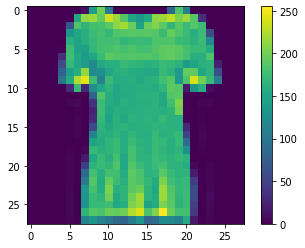

In [8]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images=train_images/255.0
test_images=test_images/255.0

In [10]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images,train_lables,epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2229 - accuracy: 0.9165


In [26]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=1)
print('Test Accuracy : ',test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 74.4736 - accuracy: 0.8556
Test Accuracy :  0.8555999994277954


In [22]:
Prediction=model.predict(test_images)
class_names[np.argmax(Prediction[0])]

'Ankle boot'

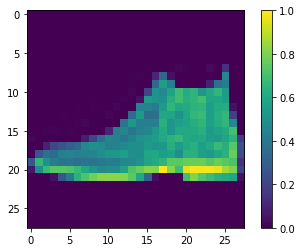

In [23]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

Pick a number: 23


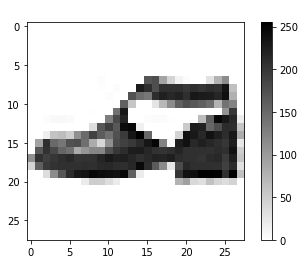

In [27]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
